In [2]:
import gsd.hoomd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import signac
from utils import check_job_for_log_equilibrium
from cmeutils.structure import gsd_rdf

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [3]:
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 3
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 200
plt.rcParams["legend.markerscale"] = 1

In [6]:
project = signac.get_project("../../testing-model/cg_tg/")

In [4]:
for job in project.find_jobs({"density": 1.35}):
    print(job.doc.equilibrated)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Check for equilibration:

In [7]:
for job in project.find_jobs({"doc.equilibrated": False}):
    if job.doc.runs != 0:
        check_job_for_log_equilibrium(job, trim_cut=1500)

In [68]:
job.sp

{'num_mols': 50, 'lengths': 25, 'density': 1.3, 'harmonic_bonds': True, 'kT': 4.4, 'n_steps': 50000000.0, 'shrink_kT': 6.0, 'shrink_n_steps': 10000000.0, 'shrink_period': 10000, 'r_cut': 4.0, 'dt': 0.0003, 'tau_kT': 100, 'gsd_write_freq': 100000.0, 'log_write_freq': 10000.0, 'sim_seed': 42, 'msibi_project': '/home/erjank_project/PPS-MSIBI/pps-msibi/msibi-flow/angle-flow-with-pairs', 'msibi_job': '34c9e9f8fa7d942743adbf6835395671'}

# Plotting Energies:

## Potential Energy

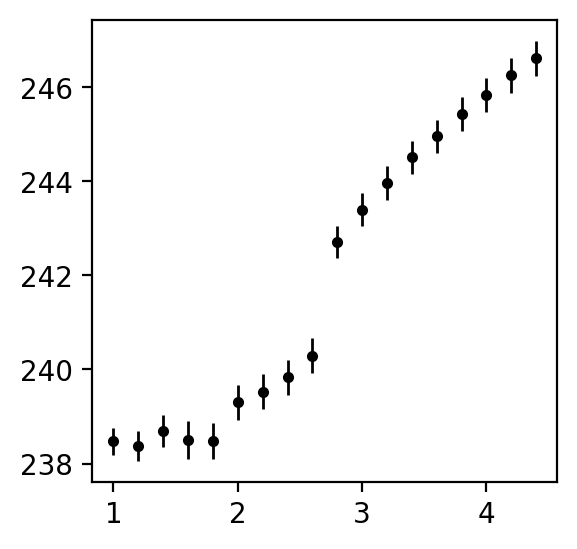

In [75]:
for kT, jobs in project.find_jobs({"doc.sampled": True}).groupby("kT"):
    for job in jobs:
        N = job.sp.num_mols * job.sp.lengths
        data = np.genfromtxt(job.fn("production.txt"), names=True)
        pe = data["mdcomputeThermodynamicQuantitiespotential_energy"]
        plt.errorbar(x=kT, y=np.mean(pe[-10000:] / N), yerr=np.std(pe[-10000:] / N), marker="o", color="k")
        #plt.vlines(x=2.8, ymin=238, ymax=246, linestyle="--", color="red")

## Pair energies

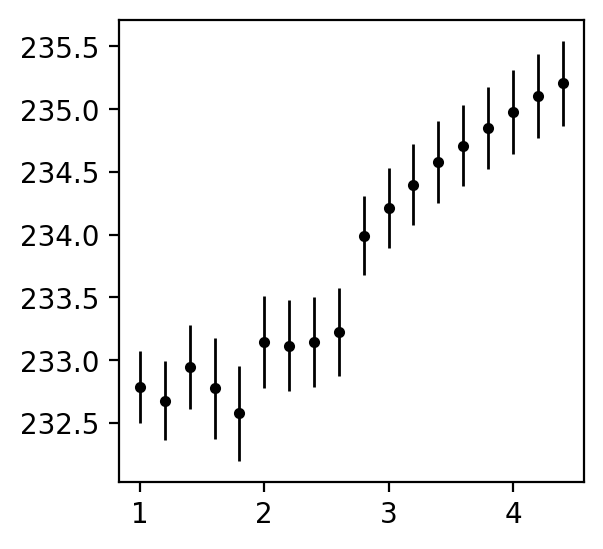

In [92]:
for kT, jobs in project.find_jobs({"doc.sampled": True}).groupby("kT"):
    for job in jobs:
        N = job.sp.num_mols * job.sp.lengths
        data = np.genfromtxt(job.fn("production.txt"), names=True)
        pair = data["mdpairTableenergy"]
        plt.errorbar(x=kT, y=np.mean(pair[-10000:] / N), yerr=np.std(pair[-10000:] / N), marker="o", color="k")
        #plt.vlines(x=2.8, ymin=238, ymax=246, linestyle="--", color="red")

## Angle energies

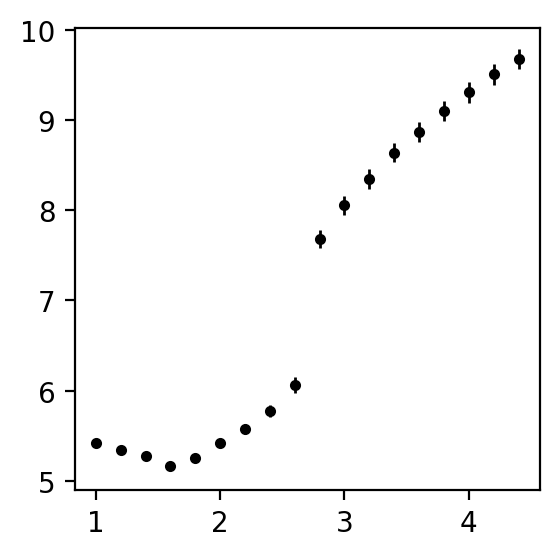

In [88]:
for kT, jobs in project.find_jobs({"doc.sampled": True}).groupby("kT"):
    for job in jobs:
        N = (job.sp.num_mols - 2) * job.sp.lengths
        data = np.genfromtxt(job.fn("production.txt"), names=True)
        angles = data["mdangleTableenergy"]
        plt.errorbar(x=kT, y=np.mean(angles[-10000:] / N), yerr=np.std(angles[-10000:] / N), marker="o", color="k")

## Kinetic energies:

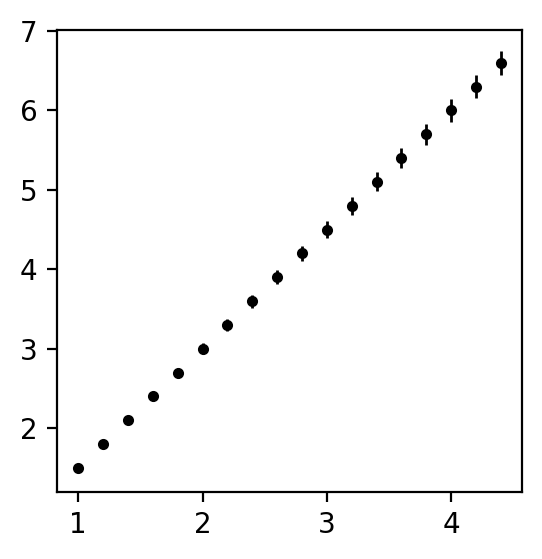

In [93]:
for kT, jobs in project.find_jobs({"doc.sampled": True}).groupby("kT"):
    for job in jobs:
        N = job.sp.num_mols * job.sp.lengths
        data = np.genfromtxt(job.fn("production.txt"), names=True)
        ke = data["mdcomputeThermodynamicQuantitieskinetic_energy"]
        plt.errorbar(x=kT, y=np.mean(ke[-10000:] / N), yerr=np.std(ke[-10000:] / N), marker="o", color="k")
        #plt.vlines(x=2.8, ymin=238, ymax=246, linestyle="--", color="red")

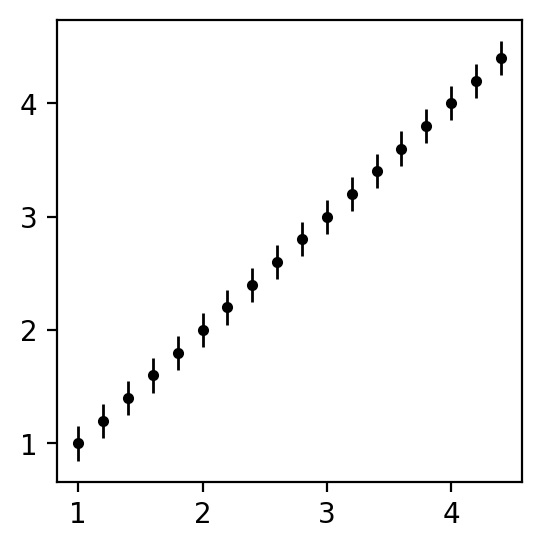

In [114]:
for kT, jobs in project.find_jobs({"doc.sampled": True}).groupby("kT"):
    for job in jobs:
        N = job.sp.num_mols * job.sp.lengths
        data = np.genfromtxt(job.fn("production.txt"), names=True)
        kinetic_temp = data["mdcomputeThermodynamicQuantitieskinetic_temperature"]
        plt.errorbar(x=kT, y=np.mean(kinetic_temp[-10000:]), yerr=np.std(ke[-10000:] / N), marker="o", color="k")
        #plt.vlines(x=2.8, ymin=238, ymax=246, linestyle="--", color="red")

## Pressure

1.0 3.080205746
1.2 3.099189258
1.4 3.092605532
1.6 3.035563465
1.8 3.0910542139999997
2.0 3.212987563
2.2 3.26327794
2.4 3.331603638
2.6 3.424925531
2.8 3.7428129780000003
3.0 3.8153941810000003
3.2 3.89040018
3.4 3.9554246399999995
3.6 4.021090361
3.8 4.086316638
4.0 4.147848415
4.2 4.2128199099999994
4.4 4.271857165


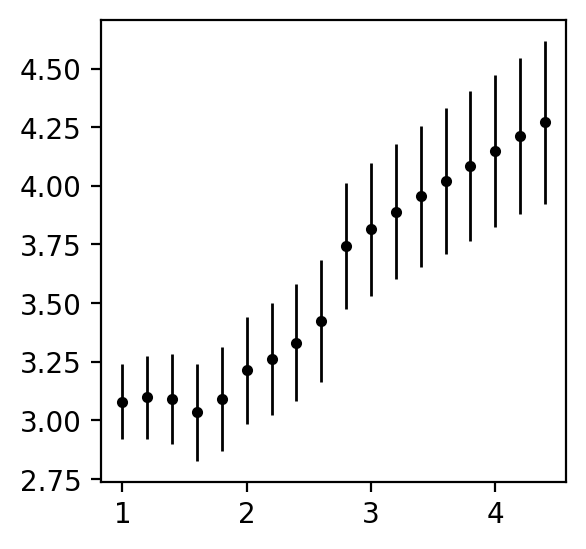

In [5]:
for kT, jobs in project.find_jobs({"doc.sampled": True}).groupby("kT"):
    for job in jobs:
        data = np.genfromtxt(job.fn("production.txt"), names=True)
        pressure = data["mdcomputeThermodynamicQuantitiespressure"]
        plt.errorbar(x=kT, y=np.mean(pressure[-10000:]), yerr=np.std(pressure[-10000:]), marker="o", color="k")
        print(kT, np.mean(pressure[-10000:]))

# Radial Distribution Functions:

### Reduced units

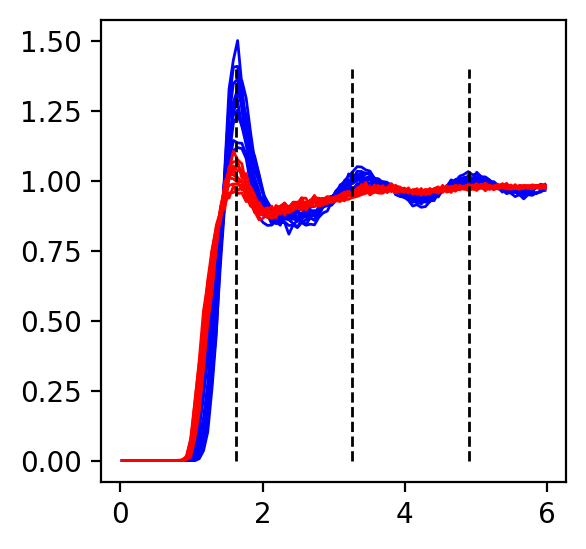

In [7]:
for kT, jobs in project.find_jobs({"doc.sampled": True, "density": 1.30}).groupby("kT"):
    if kT <= 2.6:
        c="blue"
    else:
        c="r"
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("production.gsd"),
            A_name="A",
            B_name="A",
            exclude_bonded=True,
            start=10,
            stop=20,
            r_max=6
        )
        plt.plot(rdf.bin_centers, rdf.rdf, label=kT, c=c)
        
a = 0.561 / job.doc.ref_length
b = 0.867 / job.doc.ref_length

plt.vlines(x=a, ymin=0, ymax=1.4, linestyle="--", color="k")
#plt.vlines(x=b, ymin=0, ymax=1.4, linestyle="--", color="k")
plt.vlines(x=a * 2, ymin=0, ymax=1.4, linestyle="--", color="k")
plt.vlines(x=a * 3, ymin=0, ymax=1.4, linestyle="--", color="k")
#plt.vlines(x=b * 2, ymin=0, ymax=1.4, linestyle="--", color="k")
#plt.legend()

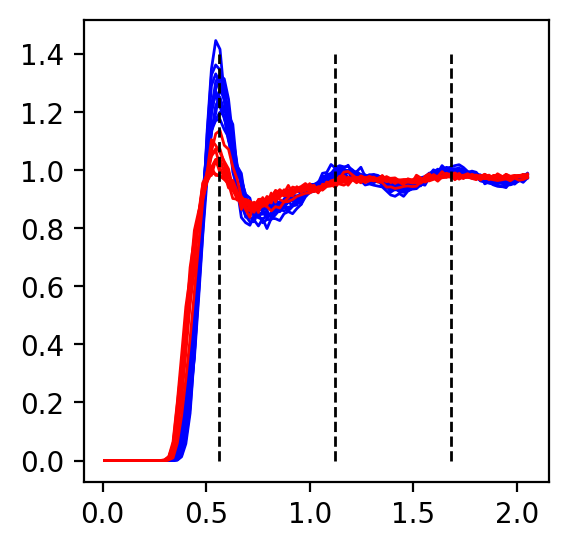

In [5]:
for kT, jobs in project.find_jobs({"density": 1.35}).groupby("kT"):
    if kT <= 2.6:
        c="blue"
    else:
        c="r"
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("production.gsd"),
            A_name="A",
            B_name="A",
            exclude_bonded=True,
            start=10,
            stop=20,
            r_max=6
        )
        plt.plot(rdf.bin_centers * job.doc.ref_length, rdf.rdf, label=kT, c=c)

plt.vlines(x=0.561, ymin=0, ymax=1.4, linestyle="--", color="k")
#plt.vlines(x=0.867, ymin=0, ymax=1.4, linestyle="--", color="k")
plt.vlines(x=0.561 * 2, ymin=0, ymax=1.4, linestyle="--", color="k")
plt.vlines(x=0.561 * 3, ymin=0, ymax=1.4, linestyle="--", color="k")
#plt.vlines(x=0.867 * 2, ymin=0, ymax=1.4, linestyle="--", color="k")
#plt.legend()

# Check MSD results:

## Diffusion Coefficients

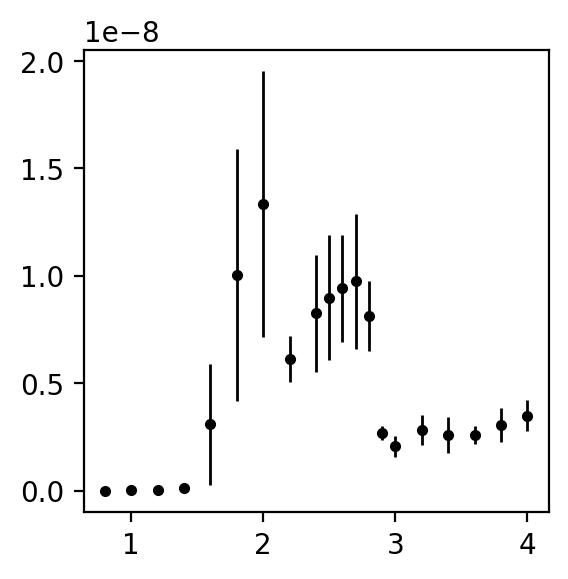

In [5]:
for kT, jobs in project.find_jobs({"doc.sampled": True, "density": 1.35}).groupby("kT"):
    for job in jobs:
        slopes = []
        for i in range(15):
            time = np.load(job.fn(f"msd_time{i}.npy"))
            msd = np.load(job.fn(f"msd_data_real{i}.npy"))
            slope_start = 100
            slope_end = 199
            slope, intercept, _, _, _ = linregress(time[slope_start:slope_end], msd[slope_start:slope_end])
            slopes.append(slope)
        plt.errorbar(x=kT, y=np.mean(slopes), yerr=np.std(slopes), marker="o", c="k")

In [5]:
for job in project:
    print(job.sp.kT, job.path)

1.0 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/0927acfa511db0b4bb60d0aa8e45e005
1.2 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/ca90fa55afba0f95efbde8840ff4f711
1.4 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/52fd03bc80dc5e26f754db7b01dc6803
1.6 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/e358170ca3880ef685ec287b903950a7
1.8 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/f1fc99618b5b29d94c84062914549c9f
2.0 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/a5d180ec10ef47ebbc7a2521ebfbdc09
2.2 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/9d513f5c24194aaa747ce4d270c3208b
2.4 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/b93f9da3fd29a2e856354a3279f91daa
2.6 /home/erjank_project/PPS-MSIBI/pps-msibi/testing-model/cg_tg/workspace/dafd71dbd3b329c9a28d4311d8141c8d
2.8 /home/erjank_project/PPS

## Mean Square Displacements

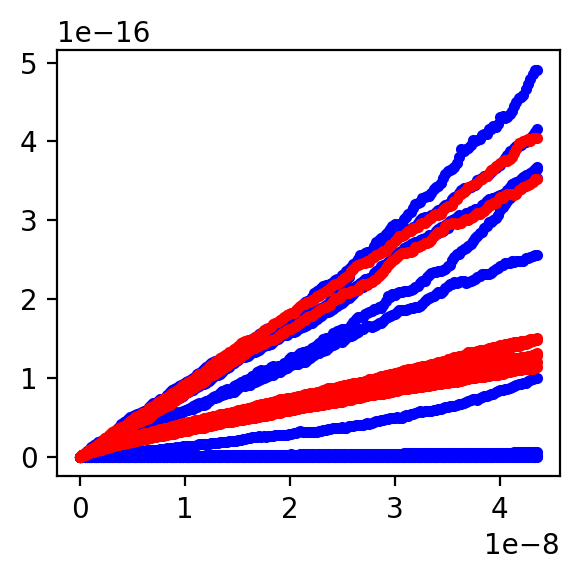

In [6]:
for kT, jobs in project.find_jobs({"doc.sampled": True, "density": 1.35}).groupby("kT"):
    if kT <= 2.6:
        c="blue"
    else:
        c="r"
    for job in jobs:
        msd_avg = np.zeros(200)
        for i in range(15):
            time = np.load(job.fn(f"msd_time{i}.npy"))
            msd = np.load(job.fn(f"msd_data_real{i}.npy"))
            msd_avg += msd
        plt.plot(time, msd_avg / 15, marker="o", label=kT, c=c)

#plt.legend()
plt.tight_layout()

In [113]:
with gsd.hoomd.open(job.fn("production.gsd"), "r") as traj:
    snap = traj[-1]